# 환경구성

In [ ]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 실행 후 "런타임 다시 시작..." 실행 (이 부분은 실행할 필요 없음)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 한국어 형태소 분석 라이브러리
!pip install konlpy

     |████████████████████████████████| 19.4 MB 11.9 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 448 kB 51.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 토픽모형 분석을 위한 라이브러리
!pip install gensim

# 1.문서 수치화 : 카운트 기반(즉, 빈도수 기반)의 단어 표현(Count based word Representation) -> 2가지가 있죠? 원핫인코딩, 벡오브워드

## 가.One-Hot Encoding

In [ ]:
# one hot encoding text
docs = '''나는 매우 매우 나는 매우 좋은 선생님 입니다
당신은 매우 좋은 학생 학생 학생 입니다
당신은 매우 좋은 학생 학생 입니다'''

In [ ]:
tokens = docs.split()
print(tokens)

['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '학생', '학생', '학생', '입니다', '당신은', '매우', '좋은', '학생', '학생', '입니다']


In [ ]:
words = list(dict.fromkeys(tokens))
words

['나는', '매우', '좋은', '선생님', '입니다', '당신은', '학생']

In [ ]:
# 각 단어에 고유한 번호 부여한 dictionary 생성
word_to_id = {'[PAD]': 0, '[UNK]': 1}  # [PAD]: 길이 맞추는 용도, [UNK]: 알 수 없는 token
for word in words:
    word_to_id[word] = len(word_to_id)

print(word_to_id)

{'[PAD]': 0, '[UNK]': 1, '나는': 2, '매우': 3, '좋은': 4, '선생님': 5, '입니다': 6, '당신은': 7, '학생': 8}


In [ ]:
# 각 단어로 수치를 찾는 반면 수치로 단어 찾는 방법도 만들어줘야함 
# 고유한 번호(수치)로 부터 단어를 찾을 수 있는 dictionary 생성
id_to_word = {_id:word for word, _id in word_to_id.items()}
print(id_to_word)

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '매우', 4: '좋은', 5: '선생님', 6: '입니다', 7: '당신은', 8: '학생'}


In [ ]:
# 줄바꿈 단위로 문장 분리
sentences = docs.split("\n")
sentences

['나는 매우 매우 나는 매우 좋은 선생님 입니다', '당신은 매우 좋은 학생 학생 학생 입니다', '당신은 매우 좋은 학생 학생 입니다']

In [ ]:
# 띄어쓰기 단위로 단어 분리
tokens = []
for sentence in sentences:
    tokens.append(sentence.split())
tokens

[['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '입니다']]

In [ ]:
for i in tokens:
  print(i)

['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다']
['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다']
['당신은', '매우', '좋은', '학생', '학생', '입니다']


In [ ]:
# tokens을 vocabulary의 고유 번호로 변경
token_ids = []
for line_token in tokens:
    token_ids.append([word_to_id[token] for token in line_token])
token_ids

[[2, 3, 3, 2, 3, 4, 5, 6], [7, 3, 4, 8, 8, 8, 6], [7, 3, 4, 8, 8, 6]]

In [ ]:
# one hot encoding
one_hot_encodings = []
for line_token in token_ids:
    print(line_token)
    one_hot_line = []  # 한 줄을 표현하는 벡터
    for id in line_token:
        # print(id)
        one_hot = [0] * len(word_to_id)  # 모두 0인 벡터를 만듬
        # print(one_hot)
        one_hot[id] = 1  # 단어 id만 1로 변경
        print(id, one_hot)
        one_hot_line.append(one_hot)  # 단어를 라인에 추가
    print(one_hot_line)
    one_hot_encodings.append(one_hot_line)  # 라인을 전체 문서에 추가

# 결과분석: 8개의행, 7개의행, 6개의행이 생김 따라서 원핫인코딩을 해주면
# 하나의 행이 하나의 토큰을 표현하기 때문에 많은 행열이 필요함
# 이런걸 sparse(희소)한 결과물이다. 라고 칭함(불필요하게 칸을 많이 차지한다)

[2, 3, 3, 2, 3, 4, 5, 6]
2 [0, 0, 1, 0, 0, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
4 [0, 0, 0, 0, 1, 0, 0, 0, 0]
5 [0, 0, 0, 0, 0, 1, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1, 0, 0]
[[0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0]]
[7, 3, 4, 8, 8, 8, 6]
7 [0, 0, 0, 0, 0, 0, 0, 1, 0]
3 [0, 0, 0, 1, 0, 0, 0, 0, 0]
4 [0, 0, 0, 0, 1, 0, 0, 0, 0]
8 [0, 0, 0, 0, 0, 0, 0, 0, 1]
8 [0, 0, 0, 0, 0, 0, 0, 0, 1]
8 [0, 0, 0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1, 0, 0]
[[0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0]]
[7, 3, 4, 8, 8, 6]
7 [0, 0, 0, 0, 0, 0, 0, 1, 0]
3 [0, 0, 0, 1, 0,

In [ ]:
one_hot_encodings

[[[0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 1, 0, 0]]]

In [ ]:
import numpy as np
np.argmax(np.array(one_hot_encodings[2]), axis=-1)  
# argmax를통해 각
# 어느 인덱스가 최대값인지 출력
# axis=-1 은 행을 기준으로 비교하는것 

array([7, 3, 4, 8, 8, 6])

In [ ]:
token_ids[2]
for token in token_ids[2]:
  print(id_to_word[token])

당신은
매우
좋은
학생
학생
입니다


In [ ]:
# 위에껀 너무 어려우니까
# 바로 tensorflow를 이용해 원핫인코딩을 해줄수있다.

import tensorflow as tf
# tensorflow one hot
# token_ids가 길이(행)가 달라서 오류 발생
# depth는 vocabulary 크기

# tf_one_hot_encodings = tf.one_hot(indices=token_ids, depth=len(word_to_id))
# tf_one_hot_encodings

In [ ]:
id_to_word

{0: '[PAD]',
 1: '[UNK]',
 2: '나는',
 3: '매우',
 4: '좋은',
 5: '선생님',
 6: '입니다',
 7: '당신은',
 8: '학생'}

In [ ]:
# token_ids가 앞 1개만 one_hot으로 변경
print(len(word_to_id))  # 행은 9개라는 뜻
print(token_ids[2])
tf_one_hot_encodings = tf.one_hot(indices=token_ids[2], depth=len(word_to_id))
tf_one_hot_encodings

9
[7, 3, 4, 8, 8, 6]


<tf.Tensor: shape=(6, 9), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)>

In [ ]:
# 모두 길이가 8이 되도록 pad(0) 추가
pad_ids = []
for line in token_ids:
    line = line[:8]
    line += [0] * (8 - len(line))
    # print(line)
    pad_ids.append(line)
pad_ids

[[2, 3, 3, 2, 3, 4, 5, 6], [7, 3, 4, 8, 8, 8, 6, 0], [7, 3, 4, 8, 8, 6, 0, 0]]

In [ ]:
tf_one_hot_encodings = tf.one_hot(indices=pad_ids, depth=len(word_to_id))
tf_one_hot_encodings

<tf.Tensor: shape=(3, 8, 9), dtype=float32, numpy=
array([[[0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 

## 나.Bag of Words

* 모든 단어를 포함하는 vocab을 만들어서 각 단어에 인텍스를 부여
* vocab의 인텍스 위치에 그단어의 등장횟수를 기록

#### 1)말뭉치 사전 만들기

In [ ]:
# 토큰으로 분리
tokens = docs.split()
words = list(dict.fromkeys(tokens))
words

['나는', '매우', '좋은', '선생님', '입니다', '당신은', '학생']

In [ ]:
# 각 단어에 고유한 번호 부여한 dictionary 생성
word_to_id = {}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'나는': 0, '당신은': 5, '매우': 1, '선생님': 3, '입니다': 4, '좋은': 2, '학생': 6}

In [ ]:
word_to_id.values()

# BOW에선 PAD, UNK이 필요없네 
# 그 길이를 맞출 필요가 없으니까!!

dict_values([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# 고유한 번호로 부터 단어를 찾을 수 있는 dictionary 생성
id2word = {_id:word for word, _id in word_to_id.items()}
id2word

{0: '나는', 1: '매우', 2: '좋은', 3: '선생님', 4: '입니다', 5: '당신은', 6: '학생'}

In [ ]:
# 말뭉치 사전 : id2word, 말뭉치 단어기준 index :word_to_id
id2word

{0: '나는', 1: '매우', 2: '좋은', 3: '선생님', 4: '입니다', 5: '당신은', 6: '학생'}

#### 2) BOW 생성

말뭉치 사전의 토큰 인덱스 위치에 토큰 출현 회수 누적

In [ ]:
# 줄바꿈 단위로 문장 분리
sentences = docs.split("\n")
# print(sentences)


In [ ]:
# 내가 이해할라고 넣은 코드 원랜 위,아래 코드가 붙어있었음
for sentence in sentences:
  print(sentence.split())

['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다']
['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다']
['당신은', '매우', '좋은', '학생', '학생', '입니다']


In [ ]:


# 띄어쓰기 단위로 단어 분리
tokens = []
for sentence in sentences:
    tokens.append(sentence.split())
tokens

[['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '입니다']]

In [ ]:
# 말뭉치사전에서 토큰 기준 id를 생성
token_to_id = {t:_id for _id, t in id2word.items()}
print(token_to_id)

{'나는': 0, '매우': 1, '좋은': 2, '선생님': 3, '입니다': 4, '당신은': 5, '학생': 6}


In [ ]:
# tokens을 말뭉치사전의 고유 번호로 변경
token_ids = []
for line in tokens:
      # print(line)
    token_ids.append([token_to_id[token] for token in line])
token_ids

[[0, 1, 1, 0, 1, 2, 3, 4], [5, 1, 2, 6, 6, 6, 4], [5, 1, 2, 6, 6, 4]]

#  2.문서 단어 행렬과 유사도 평가

## 가.문서 단어 행렬(Document-Term Matrix, DTM)

DTM 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기하여 문서들의 특징을 서로 비교할 수 있도록 수치화

* 희소 표현(Sparse representation) : one-hot으로 표현
* 단어의 빈도수로 표현

In [ ]:
# one hot encoding
one_hot_encodings = []
for line_token in token_ids:
    print(line_token)
    one_hot_line = []  # 한 줄을 표현하는 벡터
    for id in line_token:
        one_hot = [0] * len(id2word)  # 모두 0인 벡터를 만듬
        one_hot[id] = 1  # 단어 id만 1로 변경
        print(id, one_hot)
        one_hot_line.append(one_hot)  # 단어를 라인에 추가
    one_hot_encodings.append((one_hot_line))  # 라인을 전체 문서에 추가

[0, 1, 1, 0, 1, 2, 3, 4]
0 [1, 0, 0, 0, 0, 0, 0]
1 [0, 1, 0, 0, 0, 0, 0]
1 [0, 1, 0, 0, 0, 0, 0]
0 [1, 0, 0, 0, 0, 0, 0]
1 [0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0]
3 [0, 0, 0, 1, 0, 0, 0]
4 [0, 0, 0, 0, 1, 0, 0]
[5, 1, 2, 6, 6, 6, 4]
5 [0, 0, 0, 0, 0, 1, 0]
1 [0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1]
4 [0, 0, 0, 0, 1, 0, 0]
[5, 1, 2, 6, 6, 4]
5 [0, 0, 0, 0, 0, 1, 0]
1 [0, 1, 0, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1]
6 [0, 0, 0, 0, 0, 0, 1]
4 [0, 0, 0, 0, 1, 0, 0]


In [ ]:
# 말뭉치사전(id2word)의 인텍스를 기준으로 bow 생성
bows = []
for line in tokens:
    print(line)
    bow = [0] * len(id2word)
    print(bow)
    for t in line:
        # print(t)
        bow[token_to_id[t]] += 1
        print(t, bow)
    print()
    bows.append(bow)
bows = np.array(bows)
bows

# 결과 빈도수 합 따라서 입니다의 리스트는 총합임

['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다']
[0, 0, 0, 0, 0, 0, 0]
나는 [1, 0, 0, 0, 0, 0, 0]
매우 [1, 1, 0, 0, 0, 0, 0]
매우 [1, 2, 0, 0, 0, 0, 0]
나는 [2, 2, 0, 0, 0, 0, 0]
매우 [2, 3, 0, 0, 0, 0, 0]
좋은 [2, 3, 1, 0, 0, 0, 0]
선생님 [2, 3, 1, 1, 0, 0, 0]
입니다 [2, 3, 1, 1, 1, 0, 0]

['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다']
[0, 0, 0, 0, 0, 0, 0]
당신은 [0, 0, 0, 0, 0, 1, 0]
매우 [0, 1, 0, 0, 0, 1, 0]
좋은 [0, 1, 1, 0, 0, 1, 0]
학생 [0, 1, 1, 0, 0, 1, 1]
학생 [0, 1, 1, 0, 0, 1, 2]
학생 [0, 1, 1, 0, 0, 1, 3]
입니다 [0, 1, 1, 0, 1, 1, 3]

['당신은', '매우', '좋은', '학생', '학생', '입니다']
[0, 0, 0, 0, 0, 0, 0]
당신은 [0, 0, 0, 0, 0, 1, 0]
매우 [0, 1, 0, 0, 0, 1, 0]
좋은 [0, 1, 1, 0, 0, 1, 0]
학생 [0, 1, 1, 0, 0, 1, 1]
학생 [0, 1, 1, 0, 0, 1, 2]
입니다 [0, 1, 1, 0, 1, 1, 2]



array([[2, 3, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 3],
       [0, 1, 1, 0, 1, 1, 2]])

In [ ]:
print(list(id2word.values()),'\n')
np.sum(bows, axis=0)

# 이 다큐먼트에서 얘기하고 싶은건 나는2번 매우5번 ...
# 이 문서의 중요한 토큰(키워드)은 매우와 학생이다.
# 하지만 문서에서 단어의 빈도수를 확인하는것도 중요하지만
# 각 다큐먼트별로 많이나오는 단어(첫번째 [2,3,1,1,1,0,0]는 나는:2번 매우:3번..)
# 따라서 첫번째는 나는,매우를 가지고 설명하는것 같고, 두,세번째는 학생에 대한
# 이야기를 하는것같고..
# 그래서 많이 나오는 단어를 가지고 그 문서의 키워드라고 생각하면,
# 그 키워드를 가지고 우리가 문서를 찾아가는겁니다.

['나는', '매우', '좋은', '선생님', '입니다', '당신은', '학생'] 



array([2, 5, 3, 1, 3, 2, 5])

In [ ]:
# 행(axis=-1) 내에서 1차 오름차순으로, 2차 내림차순으로 뒤집기로 말뭉치 id  구하기 
tf = bows
tf_order = np.argsort(tf, axis=-1)
# 순서뒤집기
tf_order = np.flip(tf_order, axis=-1)
tf_order

# 결과 해석 2개 위로가면 그 결과의 array([~])에서 
# 인덱스별로 많은거 내림차순 한거임
# 즉, 위위의 [2,3,1,1,1,0,0]을 가지고 [1,0,4,3,2,6,5]를 해석하면
# 인덱스1이 가장큼 그담은 인덱스0 그담은... 이런식임 ㅇㅋ?

array([[1, 0, 4, 3, 2, 6, 5],
       [6, 5, 4, 2, 1, 3, 0],
       [6, 5, 4, 2, 1, 3, 0]])

In [ ]:
# 내가 이해할라고 넣은 코드
tf

array([[2, 3, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 3],
       [0, 1, 1, 0, 1, 1, 2]])

In [ ]:
# 내가 이해할라고 넣은 코드
for i, line in enumerate(tf_order):
  print(i, line)

0 [1 0 4 3 2 6 5]
1 [6 5 4 2 1 3 0]
2 [6 5 4 2 1 3 0]


In [ ]:
for i, line in enumerate(tf_order):
    print(line)
    str_order = [id2word[_id] for _id in line if 0 < tf[i][_id]]
    print(str_order)

# 하지만 많이나오는 횟수만을 가지고 진행하면 뭐가 문제냐,
# 의미가 없는것(나는, 입니다, 느낌표, 온점 등)의 횟수가 많이 나올때가 있다.
# 지금이야 띄어쓰기도 정리 안해서 그런데, 원랜 '나는'도 '나', '는' 두개로
# 분리되잖아. 이런 약점을 극복해주는 방법이 바로 아래 나오는 TF-IDF

[1 0 4 3 2 6 5]
['매우', '나는', '입니다', '선생님', '좋은']
[6 5 4 2 1 3 0]
['학생', '당신은', '입니다', '좋은', '매우']
[6 5 4 2 1 3 0]
['학생', '당신은', '입니다', '좋은', '매우']


## 나.TF-IDF(Term Frequency-Inverse Document Frequency)를 이용한 문서별 주제 요약

* DTM 내에 있는 각 단어에 대한 중요도를 계산(바로앞에서 한거임)
(첫번째 문장, 두번째 문장, 세번째 문장에서 다 쓰이는 단어들(위에서 보면 입니다. 당신은, 매우, 좋은 등등) 이런것은 의미없는 조사나 반복단어일 가능성이 높다.
그래서 모든 문서에서 많이 쓰인 단어 말고, 다큐먼트(문장별)별로 유니크하게 많이 쓰인 단어 즉, 그 다큐먼트에서 강조하고자 하는 토픽(혹은 키워드)이 무엇이냐를 찾아주고 싶어 합니다. 그래서 우리가 도입한게 TF-IDF입니다. 그래서 이건 뭐냐?(아래 ㄱㄱ)
* 단어의 빈도(TF)와 역 문서 빈도(IDF)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
*문서를 d, 단어를 t, 문서의 총 개수를 N 라고하면 
* tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수 (위에서 array([2,3,1,1,0,0], [0,1,1,0,1,1,3], [0,1,1,0,1,1,2]]))
* df(t) : 특정 단어 t가 등장한 문서의 수
* idf(d, t) : df(t)에 반비례하는 수, $\log{N \over df(d, t)}$
* idf 값은 작은 빈도의 단어는 큰값: 모든 문서 등장 0, 90% 등장한 단어는 0.1, 10% 등장한 단어는 2.3 

In [ ]:
# vocab 의 단어가 총 n개 라면
dtm = bows
tf = bows        # (문서수, n)
df = np.sum(tf > 0, axis=0)  # n 벡터 각 단어들이 몇개의 문서에 등장했는지 
n_df = tf.shape[0] / df # 총 문서의 수 N/ 각 단어 등장한 문서수, n벡터
idf = np.log(n_df)
print(tf.shape, df.shape, n_df.shape, idf.shape)

(3, 7) (7,) (7,) (7,)


In [ ]:
type(idf)

numpy.ndarray

In [ ]:
# idf 값은 적게등장하면 큰값: 모두 등장은 0, 90% 등장한 단어는 0.1, 10% 등장한 단어는 2.3 
print('세개의문서에서 두번, 한번 등장횟수별 IDF값', round(np.log(3/2),2), round(np.log(3/1),2))
print(dtm)
idf = [round(num,2) for num in idf]
print(idf)

# 많이등장하면 작은숫자, 적게등장하면 높은숫자를 받게됨

세개의문서에서 두번, 한번 등장횟수별 IDF값 0.41 1.1
[[2 3 1 1 1 0 0]
 [0 1 1 0 1 1 3]
 [0 1 1 0 1 1 2]]
[1.1, 0.0, 0.0, 1.1, 0.0, 0.41, 0.41]


In [ ]:
# DTM 즉 tf 행렬
import pandas as pd
pd.DataFrame(dtm, columns = list(id2word.values()))

# 결과해석: 위에는 고유한 토큰(나는, 매우, 좋은 ...)
# 아래는 등장 횟수 즉, 이런 문서를 DTM이라고 함
# 이걸로 idf를 만들건데, 3개문장이 있죠? 그게 위의 식에서 N임
# dt는 뭐냐면 3개 문장중에 몇개 문장에서 등장하는지
# 예를들어 나는은 3개문장중 1번째 문장에만있죠? 따라서 1
# 매우= 3, 좋은 = 3, 선생님 = 1, 입니다 = 3, 당신은 = 2, 학생 = 2
# 이것이 문서에 등장하는 횟수입니다 즉 dt죠

,나는,매우,좋은,선생님,입니다,당신은,학생
0,2,3,1,1,1,0,0
1,0,1,1,0,1,1,3
2,0,1,1,0,1,1,2


In [ ]:
# IDF 벡터 : 문서별로 얼마나 유니크하게 등장했나? '나는'과 '입니다' 대조 
np.array(idf).reshape(1,7)

array([[1.1 , 0.  , 0.  , 1.1 , 0.  , 0.41, 0.41]])

In [ ]:
#IDF
pd.DataFrame(np.array(idf).reshape(1,7) , columns = list(id2word.values()))

,나는,매우,좋은,선생님,입니다,당신은,학생
0,1.1,0.0,0.0,1.1,0.0,0.41,0.41


In [ ]:
# 위에서 구한 tf, idf를 곱하면 TF-IDF
# 여기저기 다 등장하면 IDF의 값이 0이기 때문에 
# 다 0을 갖게됨
# 즉 TF-IDF는 여기저기 다 등장하는게 중요한게 아니라(여기저기 다등장하면 조사혹은 의미없는 단어임)
# 어떤 특정 다큐먼트에 유니크하게 등장하는것이 더중요
#TF-IDF 행렬 : 특정문서에 유니크하게 등장한 단어 찾기
tf_idf=tf*idf
pd.DataFrame(tf_idf, columns = list(id2word.values()))

,나는,매우,좋은,선생님,입니다,당신은,학생
0,2.2,0.0,0.0,1.1,0.0,0.00,0.00
1,0.0,0.0,0.0,0.0,0.0,0.41,1.23
2,0.0,0.0,0.0,0.0,0.0,0.41,0.82


In [ ]:
# 적게 나온 단어 ID 부터 오름차순 으로, 행내에서
tfidf_order = np.argsort(tf_idf, axis=-1)
# 많이 나온 단어 ID 부터  내림차순
tfidf_order = np.flip(tfidf_order, axis=-1)
tfidf_order

array([[0, 3, 6, 5, 4, 2, 1],
       [6, 5, 4, 3, 2, 1, 0],
       [6, 5, 4, 3, 2, 1, 0]])

In [ ]:
# 문서별 주제
for i, line in enumerate(tfidf_order):
    str_order = [id2word[_id] for _id in line if 0 < tf_idf[i][_id]]
    print(str_order)

['나는', '선생님']
['학생', '당신은']
['학생', '당신은']


## 다.TF-IDF sklearn으로 계산
앞에선 간단한 다큐먼트로 했지만 원래는 대용량의 다큐먼트를 가지고 처리한다.
그래서 sklearn이라는 라이브러리 활용해서 할거다.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
# corpus를 문서단위로 list화
list_docs = docs.split('\n')
list_docs

['나는 매우 매우 나는 매우 좋은 선생님 입니다', '당신은 매우 좋은 학생 학생 학생 입니다', '당신은 매우 좋은 학생 학생 입니다']

In [ ]:
# list_docs=문서단위 list, vocabulary=word_to_id은 단어 순서(생략가능, 위에 것과 비교하기 위해 입력)
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(vocabulary=word_to_id)

# ★DTM, TF다 같은말입니다. 이 print는 DTM(TF) 출력함
print(vector.fit_transform(list_docs).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.

print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[2 3 1 1 1 0 0]
 [0 1 1 0 1 1 3]
 [0 1 1 0 1 1 2]]
{'나는': 0, '매우': 1, '좋은': 2, '선생님': 3, '입니다': 4, '당신은': 5, '학생': 6}


In [ ]:
# DTM 메트릭스를 출력 
dtm = vector.fit_transform(list_docs).toarray()
col = vector.vocabulary_.keys()
pd.DataFrame(dtm, columns=col)

,나는,매우,좋은,선생님,입니다,당신은,학생
0,2,3,1,1,1,0,0
1,0,1,1,0,1,1,3
2,0,1,1,0,1,1,2


In [ ]:
# TFIDF 벡터 : IDF 로그항 분자에 1을 더하고 로그항에 1을 더함, TF-IDF 행렬을 L2 정규화 수행
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=word_to_id)
print(tfidfv.fit_transform(list_docs).toarray())
print(tfidfv.vocabulary_)

[[0.67278311 0.59603481 0.19867827 0.33639155 0.19867827 0.
  0.        ]
 [0.         0.22598509 0.22598509 0.         0.22598509 0.29099695
  0.87299084]
 [0.         0.29760553 0.29760553 0.         0.29760553 0.38322131
  0.76644261]]
{'나는': 0, '매우': 1, '좋은': 2, '선생님': 3, '입니다': 4, '당신은': 5, '학생': 6}


In [ ]:
tfidf = tfidfv.fit_transform(list_docs).toarray()
pd.DataFrame(tfidf, columns=col)

# 매우가 나는보다 수치가 작은 이유는, 모든 문서에 쓰였기 때문이다.
# 아까같은경우는 모든 문서에 쓰인 경우를 0으로 처리했지만
# 여기선 0이 아님

,나는,매우,좋은,선생님,입니다,당신은,학생
0,0.672783,0.596035,0.198678,0.336392,0.198678,0.000000,0.000000
1,0.000000,0.225985,0.225985,0.000000,0.225985,0.290997,0.872991
2,0.000000,0.297606,0.297606,0.000000,0.297606,0.383221,0.766443


In [ ]:
# tf-idf 높은 순으로 단어 id 정렬
tfidf_order = np.flip(np.argsort(tfidfv.transform(list_docs).toarray(), axis=-1), axis=-1)
tfidf_order

array([[0, 1, 3, 4, 2, 6, 5],
       [6, 5, 4, 2, 1, 3, 0],
       [6, 5, 4, 2, 1, 3, 0]])

In [ ]:
for i, line in enumerate(tfidf_order):
    str_order = [id2word[_id] for _id in line if 0 < tf_idf[i][_id]]
    print(str_order)

# 결국은 나. 에서와 같이 결과는 똑같다.

['나는', '선생님']
['학생', '당신은']
['학생', '당신은']


##  라.문서의 유사도 평가

* BOW 벡터를 기준으로 문서(장)의 유사도를 cosine 으로 평가
* 코사인 유사도(Cosine Similarity) : $cos \theta = {\vec{a} \cdot \vec{b} \over |\vec{a}| * |\vec{b}|}$ ( 벡터의 방향이 같으면 코사인 유사도=1, 반대면 -1, 직각이면 = 0 ) 즉 문서의 유사도가 높다는것은 벡터의 방향과 크기가 유사하다.

In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
a = bows[0]  # 나는 매우 매우 나는 매우 좋은 선생님 입니다
b = bows[1]  # 당신은 매우 좋은 학생 학생 학생 입니다
c = bows[2]  # 당신은 매우 좋은 학생 학생 입니다
a,b,c

(array([2, 3, 1, 1, 1, 0, 0]),
 array([0, 1, 1, 0, 1, 1, 3]),
 array([0, 1, 1, 0, 1, 1, 2]))

In [ ]:
print(cos_sim(a,b), cos_sim(b,c), cos_sim(a,c)) 

# 결과해석: 2번째, 3번째는 학생1개 차이임 따라서 매우 유사(수치 큼)

0.34668762264076824 0.98058067569092 0.44194173824159216


## 마.LSA(잠재 의미 분석) 모형

DTM 이나 TF-IDF 모형은 기본적으로 단어의 빈도수를 기준으로 수치화하여 단어의 의미를 분석하는 것이 아님

하지만 새로운 단어나 문서에 대해서 새롭게 계산해야되는 단점

In [ ]:
X = dtm
X

array([[2, 3, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 3],
       [0, 1, 1, 0, 1, 1, 2]])

In [ ]:
# 토픽수 3, X는 DTM 행렬, n_components = 토픽수(문서의수)
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

3

In [ ]:
#svd_model.componets_는 앞서 배운 LSA에서 VT행렬에 해당
import numpy as np
np.shape(svd_model.components_)

(3, 7)

In [ ]:
terms = tfidfv.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=2):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('학생', 0.57405), ('매우', 0.56871)]
Topic 2: [('매우', 0.48968), ('나는', 0.48816)]
Topic 3: [('당신은', 0.54837), ('입니다', 0.37553)]


In [ ]:
# 단어의 빈도수 기반 잠재 토픽은 1번:학생 매우,2번 매우 나는, 3번 당신은 입니다. 
print(docs)

# 즉 LSA 모형은 각 문서별 주제를 찾아주는게 아니라, 전체에서 주제가 무엇인지를
# 찾아주는 방법이다. 이러한 접근방법이 LDA의 모티브가 됐다.
# 따라서 LSA는 잘 안쓰고 LDA를 더 자주쓴다.

나는 매우 매우 나는 매우 좋은 선생님 입니다
당신은 매우 좋은 학생 학생 학생 입니다
당신은 매우 좋은 학생 학생 입니다


## 바.LDA 모형

In [ ]:
tokens

[['나는', '매우', '매우', '나는', '매우', '좋은', '선생님', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '학생', '입니다'],
 ['당신은', '매우', '좋은', '학생', '학생', '입니다']]

In [ ]:
# corpus는 단어를 (word_id, word_frequency)의 형태로 변경, dictionary unique한 token의 리스트
from gensim import corpora
g_dictionary = corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
print(g_dictionary.token2id)
print(g_dictionary.token2id.items())
print(g_corpus)  # 각 id별로 반복횟수 

{'나는': 0, '매우': 1, '선생님': 2, '입니다': 3, '좋은': 4, '당신은': 5, '학생': 6}
dict_items([('나는', 0), ('매우', 1), ('선생님', 2), ('입니다', 3), ('좋은', 4), ('당신은', 5), ('학생', 6)])
[[(0, 2), (1, 3), (2, 1), (3, 1), (4, 1)], [(1, 1), (3, 1), (4, 1), (5, 1), (6, 3)], [(1, 1), (3, 1), (4, 1), (5, 1), (6, 2)]]


In [ ]:
# 모델훈련시키기, 토픽수와 출력 단어수 입력
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, num_topics = NUM_TOPICS, id2word=g_dictionary, passes=15)
topics = ldamodel.print_topics(num_words=2)

In [ ]:
topics

# LDA 모형이라는것은 전체 문서중에 특정문서에 유니크하게 쓰이면서
# 여러번 반복해서 사용된 단어들을 중요하게 생각하고, 그것을 토픽의 키워드다
# 라고 생각해서 발굴해내는 논리이다.

[(0, '0.143*"당신은" + 0.143*"학생"'),
 (1, '0.229*"매우" + 0.229*"학생"'),
 (2, '0.143*"당신은" + 0.143*"학생"')]

# 3.실제 데이터를 활용한 문서 토픽 요약

1.전체 문서들에 대한 한글형태소 분석기 등의 전처리를 통하여 corpus(문서리스트)와 tokens(문서별토큰리스트)을 만든다.

2.sklearn의 CountVectorizer를 이용해서 DTM을 구하고, TfidfVectorizer 클래스로 TF-IDF 행렬을 구하여 토픽과 유사성 탐색한다.

3.Gensim 라이브러리를 이용하여 LDA 모형을 학습시켜 문서별 토픽과 토픽별 키워드 등을 분석한다. 

4.wordcloud, pyLDAvis, Matplotlib 등으로 시각화 표현 

한글 형태소분석기를 가지고 형태소를 분석하는 경우도 있지만, 명사만 추출하는 방법만 사용하는 경우도 있다. 명사만 추출해서 사용하면 보다더 뜻이 명확해진다.
따라서 전처리라는것은 형태소분석기만 가지고 하는것이 아니라 분석하는 대상과 목적에 따라서 적절하게 토큰화 시킬수있는 접근방법이기 때문에 전처리는 매우 중요하다. 

## 가.전처리 후 토큰과 코퍼스 만들기

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data dir
import os
data_dir = '/content/drive/MyDrive/data'
os.listdir(data_dir)

['example.py',
 'test.txt',
 'kowiki',
 'corpus',
 '.ipynb_checkpoints',
 'A.txt',
 'news.txt']

In [ ]:
import zipfile
docs, doc = [], []

# wiki 내용 확인
with zipfile.ZipFile(os.path.join(data_dir, 'kowiki', "kowiki.txt.zip")) as z:
    with z.open("kowiki.txt") as f:
        for i, line in enumerate(f):
            line = line.decode('utf-8').strip()
            if line:
                doc.append(line)
            else:
                if doc:
                    docs.append(doc)
                doc = []
            if len(docs) >= 10:
                break
# docs[:2]
docs

[['지미 카터',
  '제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.',
  '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.',
  '1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.',
  '1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.',
  '카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.',
  '카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.',
  '그러나 이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다. 1979년 백악관에서 양국 간의 평화조약으로 이끌어졌다. 또한 소련과 제2차 전략 무기 제한 협상에 조인했다.',
  '카터는 1970년대 후반 당시 대한민국 등 인권 후진국의 국민들의 인권을 지키기 위해 노력했으며, 취임 이후 계속해서 도덕정치를 내세웠다.',
  '그러나 주 이란 미국 대사관 인질 사건에서 인질 구출 실패를 이유로 1980년 대통령 선거에서 공화당의 로널드 레이건 후보에게 져 결국 재선에 실패했다. 또한 임기 말기에 터진 소련의 아프가니스탄 침공 사건으로 인해 1980년 하계 올림픽에 반공국가

In [ ]:
# 전체 문서의 수는 10개, 첫번째 문서의 센텐스 수는 21개
print(len(docs), len(docs[0]))
# docs

10 21


In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 74.7 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 한글 형태소 분석기 선택
import konlpy
tag = konlpy.tag.Okt()

In [ ]:
# 하나의 문서 형태소 분석기로 형태소 추출 
print(tag.morphs(' '.join(docs[0])))
print(tag.nouns(' '.join(docs[0])))

['지미', '카터', '제임스', '얼', '"', '지미', '"', '카터', '주니어', '(,', '1924년', '10월', '1일', '~', ')', '는', '민주당', '출신', '미국', '39', '번째', '대통령', '(', '1977년', '~', '1981년', ')', '이다', '.', '지미', '카터', '는', '조지아주', '섬터', '카운티', '플레인스', '마을', '에서', '태어났다', '.', '조지아', '공과', '대학교', '를', '졸업', '하였다', '.', '그', '후', '해군', '에', '들어가', '전함', '·', '원자력', '·', '잠수함', '의', '승무원', '으로', '일', '하였다', '.', '1953년', '미국', '해군', '대위', '로', '예', '편하였고', '이후', '땅콩', '·', '면화', '등', '을', '가꿔', '많은', '돈', '을', '벌었다', '.', '그', '의', '별명', '이', '"', '땅콩', '농부', '"', '(', 'Peanut', 'Farmer', ')', '로', '알려졌다', '.', '1962년', '조지아', '주', '상원', '의원', '선거', '에서', '낙선', '하나', '그', '선거', '가', '부정선거', '였', '음', '을', '입증', '하게', '되어', '당선', '되고', ',', '1966년', '조지아', '주', '지사', '선거', '에', '낙선', '하지만', '1970년', '조지아', '주', '지사', '를', '역임', '했다', '.', '대통령', '이', '되기', '전', '조지아주', '상원의원', '을', '두', '번', '연', '임', '했으며', ',', '1971년', '부터', '1975년', '까지', '조지아', '지사', '로', '근무', '했다', '.', '조지아', '주', '지사', '로', '지내면서', ',', '미국

In [ ]:
# 문서별로 한글 형태소 분석기로 전처리 후 형태소만 추출하고, Stop words 제거, 한글자 제거 후 tokens으로 담기 
tokens=[]
corpus =[]
stopwords = ['(,', '것', '계','간의']
for doc in docs:
  morp = tag.morphs(' '.join(doc))
  morp = [x for x in morp if x not in stopwords] 
  morp = [x for x in morp if len(x) > 1]
  tokens.append(morp)
  corpus.append(' '.join(morp))

print(corpus)
print(tokens)

# tokens는 문서별 토큰들을 찾아준것을 하나의 리스트로 만든것
# corpus는 그것을 다 합쳐놓은 것이죠

['지미 카터 제임스 지미 카터 주니어 1924년 10월 1일 민주당 출신 미국 39 번째 대통령 1977년 1981년 이다 지미 카터 조지아주 섬터 카운티 플레인스 마을 에서 태어났다 조지아 공과 대학교 졸업 하였다 해군 들어가 전함 원자력 잠수함 승무원 으로 하였다 1953년 미국 해군 대위 편하였고 이후 땅콩 면화 가꿔 많은 벌었다 별명 땅콩 농부 Peanut Farmer 알려졌다 1962년 조지아 상원 의원 선거 에서 낙선 하나 선거 부정선거 입증 하게 되어 당선 되고 1966년 조지아 지사 선거 낙선 하지만 1970년 조지아 지사 역임 했다 대통령 되기 조지아주 상원의원 했으며 1971년 부터 1975년 까지 조지아 지사 근무 했다 조지아 지사 지내면서 미국 사는 흑인 용법 세웠다 1976년 대통령 선거 민주당 후보 출마 하여 도덕 주의 정책 으로 내세워 포드 누르고 당선 되었다 카터 대통령 에너지 개발 촉구 했으나 공화당 반대 무산 되었다 카터 이집트 이스라엘 조정 하여 캠프 데이비드 에서 안와르 사다트 대통령 메나헴 베긴 수상 함께 중동 평화 캠프데이비드 협정 체결 했다 그러나 공화당 미국 유대인 단체 반발 일으켰다 1979년 백악관 에서 양국 평화조약 으로 이끌어졌다 또한 소련 전략 무기 제한 협상 조인 했다 카터 1970년 후반 당시 대한민국 인권 후진국 국민 인권 지키기 위해 노력 했으며 취임 이후 계속 해서 도덕 정치 세웠다 그러나 이란 미국 대사관 인질 사건 에서 인질 구출 실패 이유 1980년 대통령 선거 에서 공화당 로널드 레이건 후보 에게 결국 재선 실패했다 또한 임기 말기 터진 소련 아프가니스탄 침공 사건 으로 인해 1980년 올림픽 국가 보이콧 세웠다 지미 카터 대한민국 과의 관계 에서도 중요한 영향 미쳤던 대통령 하나 인권 문제 미군 철수 문제 한때 한미 관계 불편하기도 했다 1978년 대한민국 대한 북한 위협 대비 한미연합사 창설 하면서 1982년 까지 단계 걸쳐 미군 철수 하기로 했다 그러나 미군 사령부 정보기관 의회 반대 

## 나.Sklearn으로 DTM, TF-IDF를 만들어 탐색하기

In [ ]:
# DTM 구하기, corpus 문서단위 리스트, 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
pd.DataFrame(dtm, columns=col)

,10월,12,1924년,1953년,1962년,1966년,1970년,1971년,1975년,1976년,1977년,1978년,1979년,1980년,1981년,1982년,1993년,1일,2002년,2011년,26일,29일,39,3일,4월,5.17,"6,000",6월,Farmer,Peanut,가꿔,갈등,감시,감축,갑자기,강하게,강한,같은,같이,개발,...,림화,무역,반음,반음계,변궁,변치,분위기,붙는다,붙일,서양,선율,소리,순서,시로,쓰이기도,쓰이지만,악곡,알려,온음계,올라가면서,용어,위로,으뜸음,으로도,음계,음높이,음으로,음정,임종,장음계,준다,중려,지니,클래스,태주,팔음음계,피치,화성,화음,황종
0,2,2,1,1,1,1,2,1,1,1,1,2,3,3,1,1,2,1,1,1,2,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,4,1,1,1,1,2,2,1,1,1,2,1,1,1,1,3,1,1,1,1,1,20,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1


In [ ]:
# TFIDF 도표 구하기 : 딕셔너리는 vocab, 분석대상은 corpus
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=g_dictionary.token2id)
tfidf = tfidfv.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
pd.DataFrame(tfidf, columns=col)

,10월,12,1924년,1953년,1962년,1966년,1970년,1971년,1975년,1976년,1977년,1978년,1979년,1980년,1981년,1982년,1993년,1일,2002년,2011년,26일,29일,39,3일,4월,5.17,"6,000",6월,Farmer,Peanut,가꿔,갈등,감시,감축,갑자기,강하게,강한,같은,같이,개발,...,림화,무역,반음,반음계,변궁,변치,분위기,붙는다,붙일,서양,선율,소리,순서,시로,쓰이기도,쓰이지만,악곡,알려,온음계,올라가면서,용어,위로,으뜸음,으로도,음계,음높이,음으로,음정,임종,장음계,준다,중려,지니,클래스,태주,팔음음계,피치,화성,화음,황종
0,0.047606,0.040469,0.023803,0.023803,0.023803,0.023803,0.047606,0.023803,0.023803,0.023803,0.023803,0.047606,0.071409,0.071409,0.023803,0.023803,0.047606,0.023803,0.023803,0.023803,0.047606,0.023803,0.023803,0.023803,0.023803,0.0,0.0,0.023803,0.0,0.0,0.023803,0.023803,0.023803,0.023803,0.023803,0.023803,0.020235,0.012778,0.031478,0.020235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021933,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072761,0.045948,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035978,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

### 문서 유사도 탐색

In [ ]:
corpus

['지미 카터 제임스 지미 카터 주니어 1924년 10월 1일 민주당 출신 미국 39 번째 대통령 1977년 1981년 이다 지미 카터 조지아주 섬터 카운티 플레인스 마을 에서 태어났다 조지아 공과 대학교 졸업 하였다 해군 들어가 전함 원자력 잠수함 승무원 으로 하였다 1953년 미국 해군 대위 편하였고 이후 땅콩 면화 가꿔 많은 벌었다 별명 땅콩 농부 Peanut Farmer 알려졌다 1962년 조지아 상원 의원 선거 에서 낙선 하나 선거 부정선거 입증 하게 되어 당선 되고 1966년 조지아 지사 선거 낙선 하지만 1970년 조지아 지사 역임 했다 대통령 되기 조지아주 상원의원 했으며 1971년 부터 1975년 까지 조지아 지사 근무 했다 조지아 지사 지내면서 미국 사는 흑인 용법 세웠다 1976년 대통령 선거 민주당 후보 출마 하여 도덕 주의 정책 으로 내세워 포드 누르고 당선 되었다 카터 대통령 에너지 개발 촉구 했으나 공화당 반대 무산 되었다 카터 이집트 이스라엘 조정 하여 캠프 데이비드 에서 안와르 사다트 대통령 메나헴 베긴 수상 함께 중동 평화 캠프데이비드 협정 체결 했다 그러나 공화당 미국 유대인 단체 반발 일으켰다 1979년 백악관 에서 양국 평화조약 으로 이끌어졌다 또한 소련 전략 무기 제한 협상 조인 했다 카터 1970년 후반 당시 대한민국 인권 후진국 국민 인권 지키기 위해 노력 했으며 취임 이후 계속 해서 도덕 정치 세웠다 그러나 이란 미국 대사관 인질 사건 에서 인질 구출 실패 이유 1980년 대통령 선거 에서 공화당 로널드 레이건 후보 에게 결국 재선 실패했다 또한 임기 말기 터진 소련 아프가니스탄 침공 사건 으로 인해 1980년 올림픽 국가 보이콧 세웠다 지미 카터 대한민국 과의 관계 에서도 중요한 영향 미쳤던 대통령 하나 인권 문제 미군 철수 문제 한때 한미 관계 불편하기도 했다 1978년 대한민국 대한 북한 위협 대비 한미연합사 창설 하면서 1982년 까지 단계 걸쳐 미군 철수 하기로 했다 그러나 미군 사령부 정보기관 의회 반대 

In [ ]:
# DTM을 이용한 문서 유사도 평가
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))
       
print(cos_sim(dtm[0],dtm[1]), cos_sim(dtm[1],dtm[2]),cos_sim(dtm[1],dtm[8]) ) 

# 위 corpus에서 2번째 3번째가 수학에 관련된 이야기임
# 따라서 3개 비교한거중에 2번째거 숫자가 젤 큼
# 첫번째와 여덟번째는 차이가 큼

0.21146404843626124 0.2592990554665444 0.18722889683836558


In [ ]:
# 문서 유사도 평가  :  dtm으로 비교, tfidf로 비교 
print(cos_sim(dtm[0],dtm[1]), cos_sim(dtm[1],dtm[2]),cos_sim(dtm[1],dtm[8]),cos_sim(dtm[1],dtm[9]) ) 
print(cos_sim(tfidf[0],tfidf[1]), cos_sim(tfidf[1],tfidf[2]),cos_sim(tfidf[1],tfidf[8]),cos_sim(tfidf[1],tfidf[9]) ) 

# DTM이나 TF 둘다 단어의 빈도수나 중요도를 가지고 보여주는거기 때문에
# 그 벡터를 가지고 코사인 유사도를 비교하면 결국 문서의 유사도를 식별할수있다. 

# 0번과 1번은 근접하지 않아있고, 2번과 3번은 근접해있고, 이런식으로 해석하는거임


0.21146404843626124 0.2592990554665444 0.18722889683836558 0.14875232266469404
0.09057673358868097 0.23050782818706855 0.11524200159771426 0.05257439118584201


### 문서별 토픽 탐색

In [ ]:
import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
tfidf_order

array([[ 130,   96,  342, ..., 1349, 1350, 1006],
       [ 625,  580,  559, ..., 1349, 1350,    0],
       [ 850,  625,  848, ..., 1349, 1350,    0],
       ...,
       [ 561, 1759,  565, ..., 1193, 1194,    0],
       [1944,  759, 1906, ..., 1311, 1312,    0],
       [1998,  995, 1977, ..., 1305, 1306,    0]])

In [ ]:
# id를 참조하여 단어 찾는 사전 
id_to_word = {_id:word for word, _id in g_dictionary.token2id.items()}
id_to_word[0]

'10월'

In [ ]:
# TF-IDF 문서별 토픽 추출 - 다른 문서와 차별화되는 유니크한 주제 
n = 10 # 토픽 상위 n 후보
topics =[]
tfidf_mat = []
for i, line in enumerate(tfidf_order):
    str_order = [id_to_word[_id] for _id in line if 0 < tfidf[i][_id]]
    tfidf_val = [tfidf[i,_id] for _id in line if 0 < tfidf[i][_id]]
    tfidf_mat.append(tfidf_val[:n])
    topics.append(str_order[:n])
    # print(str_order)

pd.DataFrame(tfidf_mat)

,0,1,2,3,4,5,6,7,8,9
0,0.384458,0.333241,0.261832,0.238029,0.169616,0.142817,0.142817,0.142817,0.121408,0.119015
1,0.516573,0.197513,0.191028,0.183857,0.173661,0.162095,0.148587,0.126959,0.126959,0.122571
2,0.763883,0.381942,0.171183,0.127314,0.101652,0.091896,0.091896,0.085592,0.085592,0.085592
3,0.625716,0.217640,0.193226,0.185014,0.138761,0.136025,0.132843,0.121399,0.108820,0.108820
4,0.520160,0.483573,0.257941,0.221092,0.173387,0.173387,0.153937,0.134695,0.128701,0.110546
5,0.466893,0.289029,0.266796,0.255680,0.245701,0.222330,0.166748,0.122851,0.118434,0.111165
6,0.621587,0.286886,0.286886,0.191257,0.191257,0.143443,0.143443,0.095629,0.095629,0.095629
7,0.554460,0.542191,0.151216,0.151216,0.146843,0.144035,0.125287,0.109149,0.105626,0.101661
8,0.670909,0.253500,0.239611,0.178205,0.178205,0.143766,0.143766,0.128630,0.122215,0.122215
9,0.782557,0.332622,0.156511,0.117384,0.117384,0.099787,0.099787,0.092940,0.087302,0.086847


In [ ]:
# 각 문서별 주제별 등장비율
pd.DataFrame(topics)

# 0번은 대통령에 관한거, 1번은 수학, 2번은 상수, 3번은 문학 ...

,0,1,2,3,4,5,6,7,8,9
0,미국,대통령,카터,인권,했다,조지아,선거,대한민국,해결,군사
1,수학,분야,발전,공간,구조,연구,개념,한다,있다,기하학
2,상수,수학,상관관계,가능한,물리,정의,또는,상관없이,수이,실수체
3,문학,감상,하는,작품,이야기,문예학,있다,사람,지는,씌어
4,목록,국가,기준,나라,몬테비데오,협약,있다,하고,포함,조건
5,화학,물질,원자,화합물,원소,결합,반응,금속,하는,유기
6,체첸,러시아,공화국,러시아인,체첸인,인구,인구시인,스탈린,제어,지역
7,방정식,맥스웰,법칙,formula,논문,자기,으로,하였다,전하,전자기파
8,초월수,집합,가산,문제,증명,수임,초월,하였다,힐베르트,대수
9,음계,음악,반음계,온음계,interval,많이,이름,에서는,전통,한다


## 다.Gensim으로 LDA 모형에 적합

In [ ]:
# LDA 모형 적합, g_dictionary 사전 만들고, g_corpus(word, count)로 정리하고, ldamodel 객체 생성 (토픽4)
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, id2word=g_dictionary, num_topics=4, passes=15)
print(ldamodel.print_topics())

[(0, '0.021*"방정식" + 0.016*"으로" + 0.015*"맥스웰" + 0.014*"에서" + 0.013*"화학" + 0.012*"하는" + 0.010*"이다" + 0.009*"있다" + 0.008*"원소" + 0.008*"물질"'), (1, '0.016*"초월수" + 0.015*"체첸" + 0.009*"집합" + 0.008*"이다" + 0.007*"으로" + 0.007*"에서" + 0.007*"하였다" + 0.007*"러시아" + 0.007*"공화국" + 0.006*"문제"'), (2, '0.021*"국가" + 0.017*"목록" + 0.012*"있다" + 0.010*"하고" + 0.010*"기준" + 0.009*"나라" + 0.007*"포함" + 0.006*"이다" + 0.006*"대한" + 0.006*"협약"'), (3, '0.014*"으로" + 0.014*"수학" + 0.011*"하는" + 0.010*"에서" + 0.010*"있다" + 0.010*"한다" + 0.008*"문학" + 0.007*"이다" + 0.007*"미국" + 0.007*"음계"')]


In [ ]:
# 문서별 주요 토픽과 키워드 정리 함수 정의
def format_topics_sentences(ldamodel=None, g_corpus=g_corpus, tokens=tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[g_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['주요토픽', '토픽 기여도', '주요 토픽 키워드']

    # Add original text to the end of the output
    contents = pd.Series(tokens)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


### 문서별 토픽 정리

In [ ]:
# 문서별 토픽정리 
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, g_corpus=g_corpus, tokens=tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['문서번호', '주요토픽', '토픽 기여도', '키워드', '토큰']
df_dominant_topic

# 위에서 num_topic=4로 정의했죠? 0번 문서에선 1번토픽을 많이 얘기하고 있는데,
# 그 토픽기여도가 0.9989정도 되고 그 키워드는 대통령...

,문서번호,주요토픽,토픽 기여도,키워드,토큰
0,0,3.0,0.9989,"으로, 수학, 하는, 에서, 있다, 한다, 문학, 이다, 미국, 음계","[지미, 카터, 제임스, 지미, 카터, 주니어, 1924년, 10월, 1일, 민주당..."
1,1,3.0,0.9992,"으로, 수학, 하는, 에서, 있다, 한다, 문학, 이다, 미국, 음계","[수학, 수학, 數學, 구조, 공간, 변화, 미적분, 개념, 다루는, 학문, 이다,..."
2,2,3.0,0.9886,"으로, 수학, 하는, 에서, 있다, 한다, 문학, 이다, 미국, 음계","[수학, 상수, 수학, 에서, 상수, 변하지, 않는, 변량, 으로, 변수, 반대말,..."
3,3,3.0,0.9985,"으로, 수학, 하는, 에서, 있다, 한다, 문학, 이다, 미국, 음계","[문학, 문학, 文學, 언어, 예술, 표현, 제재, 삼아, 새로운, 의미, 출하, ..."
4,4,2.0,0.9964,"국가, 목록, 있다, 하고, 기준, 나라, 포함, 이다, 대한, 협약","[나라, 목록, 문서, 나라, 목록, 이며, 세계, 206, 나라, 현황, 주권, ..."
5,5,0.0,0.9995,"방정식, 으로, 맥스웰, 에서, 화학, 하는, 이다, 있다, 원소, 물질","[화학, 화학, 化學, 물질, 성질, 조성, 구조, 변화, 수반, 하는, 에너지, ..."
6,6,1.0,0.9962,"초월수, 체첸, 집합, 이다, 으로, 에서, 하였다, 러시아, 공화국, 문제","[체첸, 공화국, 체첸, 공화국, ),, 또는, 여서, 체첸, 러시아, 공화국, 이..."
7,7,0.0,0.9993,"방정식, 으로, 맥스웰, 에서, 화학, 하는, 이다, 있다, 원소, 물질","[맥스웰, 방정식, 맥스웰, 방정식, Maxwell, 方程式, 전기, 자기, 발생,..."
8,8,1.0,0.9961,"초월수, 체첸, 집합, 이다, 으로, 에서, 하였다, 러시아, 공화국, 문제","[초월수, 초월수, 超越數, 계수, 유리수, 어떤, 방정식, 해도, 없는, 복소수,..."
9,9,3.0,0.9963,"으로, 수학, 하는, 에서, 있다, 한다, 문학, 이다, 미국, 음계","[음계, 음계, 音階, 음악, 에서, 음높이, pitch, 순서, 집합, 한다, 악..."


In [ ]:
# 문서별 주요 토큰 비교 
corpus

['지미 카터 제임스 지미 카터 주니어 1924년 10월 1일 민주당 출신 미국 39 번째 대통령 1977년 1981년 이다 지미 카터 조지아주 섬터 카운티 플레인스 마을 에서 태어났다 조지아 공과 대학교 졸업 하였다 해군 들어가 전함 원자력 잠수함 승무원 으로 하였다 1953년 미국 해군 대위 편하였고 이후 땅콩 면화 가꿔 많은 벌었다 별명 땅콩 농부 Peanut Farmer 알려졌다 1962년 조지아 상원 의원 선거 에서 낙선 하나 선거 부정선거 입증 하게 되어 당선 되고 1966년 조지아 지사 선거 낙선 하지만 1970년 조지아 지사 역임 했다 대통령 되기 조지아주 상원의원 했으며 1971년 부터 1975년 까지 조지아 지사 근무 했다 조지아 지사 지내면서 미국 사는 흑인 용법 세웠다 1976년 대통령 선거 민주당 후보 출마 하여 도덕 주의 정책 으로 내세워 포드 누르고 당선 되었다 카터 대통령 에너지 개발 촉구 했으나 공화당 반대 무산 되었다 카터 이집트 이스라엘 조정 하여 캠프 데이비드 에서 안와르 사다트 대통령 메나헴 베긴 수상 함께 중동 평화 캠프데이비드 협정 체결 했다 그러나 공화당 미국 유대인 단체 반발 일으켰다 1979년 백악관 에서 양국 평화조약 으로 이끌어졌다 또한 소련 전략 무기 제한 협상 조인 했다 카터 1970년 후반 당시 대한민국 인권 후진국 국민 인권 지키기 위해 노력 했으며 취임 이후 계속 해서 도덕 정치 세웠다 그러나 이란 미국 대사관 인질 사건 에서 인질 구출 실패 이유 1980년 대통령 선거 에서 공화당 로널드 레이건 후보 에게 결국 재선 실패했다 또한 임기 말기 터진 소련 아프가니스탄 침공 사건 으로 인해 1980년 올림픽 국가 보이콧 세웠다 지미 카터 대한민국 과의 관계 에서도 중요한 영향 미쳤던 대통령 하나 인권 문제 미군 철수 문제 한때 한미 관계 불편하기도 했다 1978년 대한민국 대한 북한 위협 대비 한미연합사 창설 하면서 1982년 까지 단계 걸쳐 미군 철수 하기로 했다 그러나 미군 사령부 정보기관 의회 반대 

### 토픽별 키워드 정리

In [ ]:
# 토픽별 키워드와 관련 토큰 정리
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('주요토픽')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['토픽 기여도'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['토픽번호', "토픽 기여도", "키워드", "관련 토큰"]

# Show
sent_topics_sorteddf_mallet.head(10)

,토픽번호,토픽 기여도,키워드,관련 토큰
0,0.0,0.9993,"방정식, 맥스웰, 으로, 하는, 에서, 문학, 이다, 있다, 음계, 하였다","[맥스웰, 방정식, 맥스웰, 방정식, Maxwell, 方程式, 전기, 자기, 발생, 전기장, 자기장, 전하, 밀도, 전류, 밀도, 형성, 나타내는, 편미분, 방정식, 이다,..."
1,1.0,0.9989,"미국, 국가, 대통령, 으로, 했다, 목록, 카터, 에서, 하고, 인권","[지미, 카터, 제임스, 지미, 카터, 주니어, 1924년, 10월, 1일, 민주당, 출신, 미국, 39, 번째, 대통령, 1977년, 1981년, 이다, 지미, 카터, 조..."
2,2.0,0.9961,"초월수, 집합, 하였다, 문제, 증명, 가산, 이다, 존재, 다음, 대수","[초월수, 초월수, 超越數, 계수, 유리수, 어떤, 방정식, 해도, 없는, 복소수, 이다, 방정식, 있는, 수인, 대수, 반대, 개념, 이다, 실수, 초월수, 모두, 무리수..."
3,3.0,0.9995,"으로, 에서, 화학, 수학, 있다, 한다, 하는, 이다, 원소, 물질","[화학, 화학, 化學, 물질, 성질, 조성, 구조, 변화, 수반, 하는, 에너지, 변화, 연구, 하는, 자연과학, 분야, 이다, 물리학, 역시, 물질, 다루는, 학문, 이지..."


## 라.토픽 분석결과 시각화 

OSError: ignored

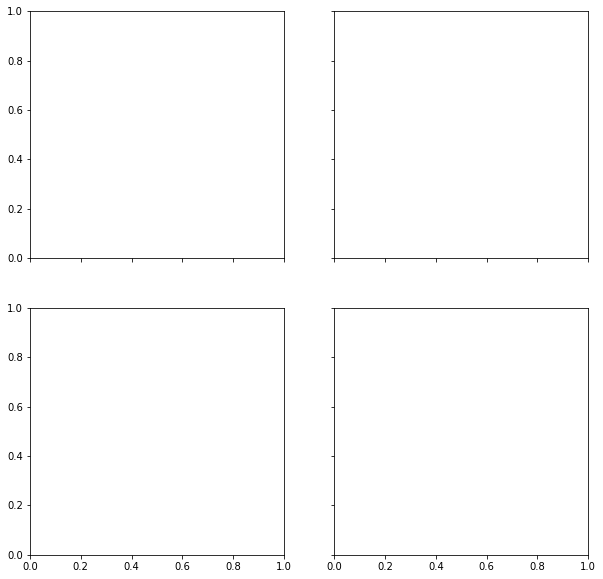

In [ ]:
# 토픽별 워드크라우딩
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
cloud = WordCloud(background_color='white',
                  font_path=fontpath,
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47589 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

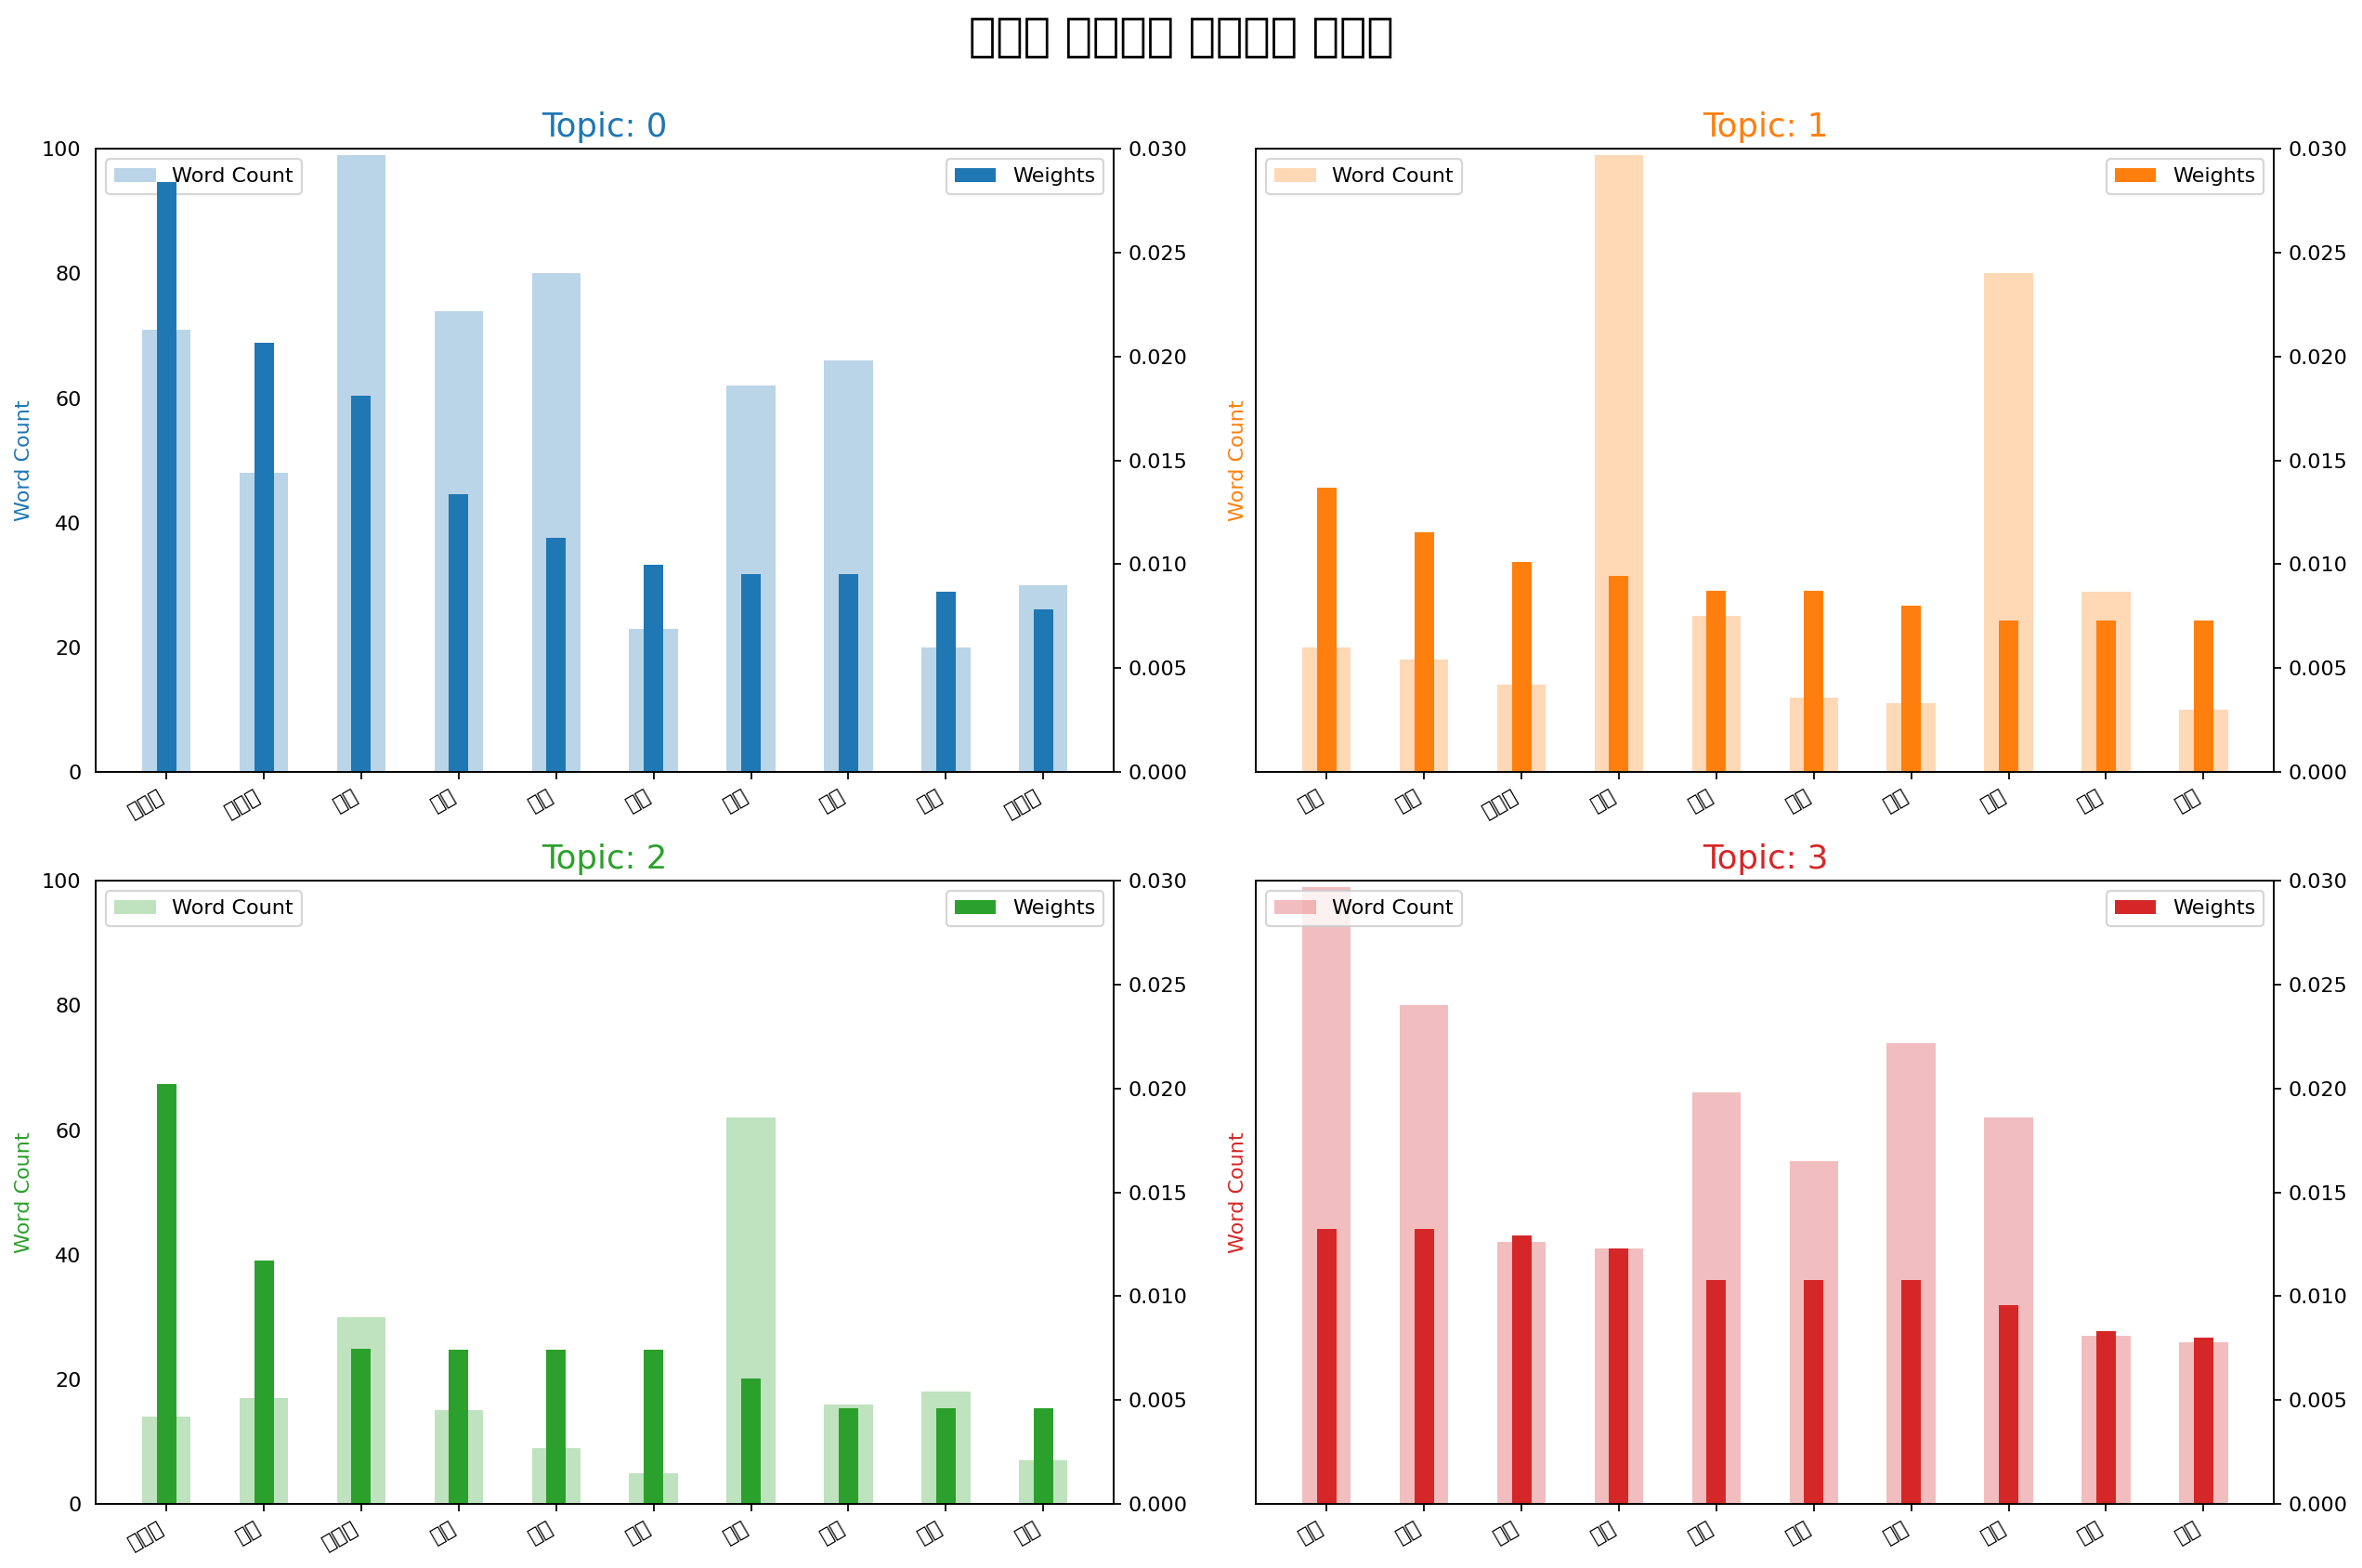

In [ ]:
# 토픽별 키워드의 빈도수와 중요도 시각화 
from collections import Counter
import matplotlib.font_manager as fm

topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in tokens for w in w_list]
counter = Counter(data_flat)

# 주제별 토픽
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

# 토픽별 키워드의 빈도수와 중요도
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 100)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('토픽별 키워드의 빈도수와 중요도', fontsize=22, y=1.05)    
plt.show()

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 5.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=5bf433f9404eee35cb0bb91059eda08a4cf27c2a1c06ede642212e6d6b8169b0
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, g_corpus, g_dictionary)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.053781  0.132489       1        1  48.514718
0     -0.109743 -0.103873       2        1  32.118149
1      0.146315 -0.029290       3        1  15.843492
2      0.017209  0.000675       4        1   3.523642, topic_info=         Term       Freq      Total Category  logprob  loglift
561       방정식  55.000000  55.000000  Default  30.0000  30.0000
1759      맥스웰  38.000000  38.000000  Default  29.0000  29.0000
759        집합  10.000000  10.000000  Default  28.0000  28.0000
130        미국  13.000000  13.000000  Default  27.0000  27.0000
1594       화학  36.000000  36.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
850        상수   0.641443  12.921700   Topic4  -5.7448   0.3427
833   formula   0.643499  16.165083   Topic4  -5.7416   0.1220
377        하여   0.642814  23.564053   Topic4  -5.7427  -0.2559
561       방정식   0.648095  55.493094   Topic4  -5.7345  -1.1043
370        하는   0.647975  58.950777   Topic4  -5.7347  -1.1649

[236 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1952      2  0.979020       )-
1693      2  0.877279    1861년
13        3  0.779943    1980년
833       1  0.061862  formula
833       2  0.866064  formula
...     ...       ...      ...
1597      1  0.996007      화합물
400       3  0.935740       활동
1896      2  0.877311       회로
832       1  0.427359     힐베르트
832       4  0.427359     힐베르트

[263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

카운트기반의 문서수치화 하는 워드인코딩(원핫,bow)을 알아봤고
문서 단어 행렬로 만들어주는 DTM 그리고 TF-IDF를 만들어서
코사인 유사도를 가지고 문장 단위 유사도를 평가하는 방법을 알아봤다.
이제 종합적으로 실제사례를 가지고 토픽모형을 분석하면서 시각화 방법까지
알아봤습니다. 그래서 이러한 방법들을 사용한다면 아주 많은 내용들의 문서를
간단하게 요약하면서 키워드 단순히 자주 등장하는 의미없는 단어가 아니라 
그 문서의 특징을 얘기해줄 수 있는 키워드를 나름대로 TF-IDF나 싱귤러벡터디컴퍼지션 방법들이 적용된 LDA모델을 이용해서 요약을 할 수 있다.는 것을 실습을 통해 알려드렸고, 여러분도 특별한 문서를 준비해서(웹크롤링으로) 토픽분석을 도전해보는 것도 좋은 의미가 있다고 생각합니다. 
